### Data Preparation

In [145]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

def cleanBosonData(infile_name):
    data = pd.read_csv(infile_name) 
    data["Y"] = np.where(data['Label'].str.contains(data['Label'].value_counts().idxmin()), 1, 0) #create col for coding Label with val 1 assigned to the minority class
    data = data.drop(columns=['Label']) #save df without original Label column
    for col in data.columns[1:data.shape[1]-1]:
        data[col+"_mv"] = np.where(data[col]==-999,1,0) #add new cols for each col to identify with a 1 where values are missing (ie. -999) and 0 otherwise
        data[col] = data[col].replace([-999],data.groupby(col+"_mv")[col].mean().max()) #take mean of 0/1 in _mv cols and use the groupby to find max mean (will always be id 1), then replace -999 values in original col
        data[col]=preprocessing.scale(data[col])
    return data

In [146]:
data_train = cleanBosonData("boson_training_cut_2000.csv")
data_test = cleanBosonData("boson_testing_cut.csv")

In [147]:
data_train[:15]

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,Y,DER_mass_MMC_mv,DER_mass_transverse_met_lep_mv,DER_mass_vis_mv,DER_pt_h_mv,DER_deltaeta_jet_jet_mv,DER_mass_jet_jet_mv,DER_prodeta_jet_jet_mv,DER_deltar_tau_lep_mv,DER_pt_tot_mv
0,100000,3.983624e-01,0.092601,0.491173,-0.444021,-1.650125e+00,-1.135322e+00,1.873193,0.888048,1.120050,1,0,0,0,0,0,0,0,0,0
1,100001,8.633960e-01,0.608117,0.639363,-0.120744,-4.978417e-16,2.786711e-16,0.000000,1.421917,-0.806390,0,0,0,0,0,1,1,1,0,0
2,100002,-3.235580e-15,3.421843,1.261884,-0.321306,-4.978417e-16,2.786711e-16,0.000000,0.997693,-0.455521,0,1,0,0,0,1,1,1,0,0
3,100003,5.108589e-01,0.989159,0.028516,-0.885926,-4.978417e-16,2.786711e-16,0.000000,1.209152,-0.886831,0,0,0,0,0,1,1,1,0,0
4,100004,1.172363e+00,-0.953916,1.504447,-0.629578,-4.978417e-16,2.786711e-16,0.000000,1.967534,-0.113790,0,0,0,0,0,1,1,1,0,0
5,100005,-6.101934e-01,-1.055284,-0.568684,0.972524,2.847897e-01,-3.515550e-01,0.097683,-1.333579,2.071958,0,0,0,0,0,0,0,0,0,0
6,100006,6.112260e-01,-0.594022,0.763961,0.808785,-1.848549e+00,-9.703647e-01,0.459320,0.727495,-0.783814,1,0,0,0,0,0,0,0,0,0
7,100007,7.387702e-01,-1.149633,0.405870,-0.424961,-4.978417e-16,2.786711e-16,0.000000,0.670062,-0.833074,1,0,0,0,0,1,1,1,0,0
8,100008,-2.821220e-01,0.059584,0.577818,-0.823823,-4.978417e-16,2.786711e-16,0.000000,0.679199,-0.699553,0,0,0,0,0,1,1,1,0,0
9,100009,1.827460e-01,1.215814,-0.291293,2.207664,-4.978417e-16,2.786711e-16,0.000000,-1.011169,0.488265,1,0,0,0,0,1,1,1,0,0


In [148]:
data_test[:15]

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,Y,DER_mass_MMC_mv,DER_mass_transverse_met_lep_mv,DER_mass_vis_mv,DER_pt_h_mv,DER_deltaeta_jet_jet_mv,DER_mass_jet_jet_mv,DER_prodeta_jet_jet_mv,DER_deltar_tau_lep_mv,DER_pt_tot_mv
0,300000,-1.213348e-01,1.455304,0.099593,-0.447028,0.000000,-2.659827e-16,4.017959e-16,0.007415,0.498029,0,0,0,0,0,1,1,1,0,0
1,300001,-1.067373e+00,-0.715757,-0.854408,-0.103307,0.000000,-2.659827e-16,4.017959e-16,-0.758743,1.730043,0,0,0,0,0,1,1,1,0,0
2,300002,-1.159847e-01,0.480365,0.064286,-0.297389,-0.287484,6.645349e-01,-7.332925e-02,0.465570,0.505136,1,0,0,0,0,0,0,0,0,0
3,300003,8.355185e-01,0.476970,0.482975,-0.882260,0.000000,-2.659827e-16,4.017959e-16,1.416531,-0.804583,0,0,0,0,0,1,1,1,0,0
4,300004,-7.331470e-15,0.925326,-0.484386,-0.473912,0.000000,-2.659827e-16,4.017959e-16,-0.195354,0.417565,0,1,0,0,0,1,1,1,0,0
5,300005,-1.796131e-01,-0.855976,-0.014103,0.172554,-1.530864,-1.319701e+00,3.790528e-01,-0.038785,-0.811783,1,0,0,0,0,0,0,0,0,0
6,300006,1.168565e+00,0.796348,0.799754,1.242662,0.000000,-2.659827e-16,4.017959e-16,-0.283905,0.267018,0,0,0,0,0,1,1,1,0,0
7,300007,-7.331470e-15,0.884359,-1.492148,-0.786593,0.000000,-2.659827e-16,4.017959e-16,-2.084442,-0.518262,0,1,0,0,0,1,1,1,0,0
8,300008,-1.208349e+00,0.039169,-0.849684,-0.885431,0.000000,-2.659827e-16,4.017959e-16,-0.045202,-0.814074,0,0,0,0,0,1,1,1,0,0
9,300009,3.212555e-01,-1.069199,0.576028,0.819568,4.221490,5.381705e+00,-4.487027e+00,-0.847294,-0.829082,1,0,0,0,0,0,0,0,0,0


In [149]:
import matplotlib
import matplotlib.pyplot as plt
from sklearn import linear_model, svm
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
%matplotlib inline
X_train = data_train.drop(['EventId','Y'],1)
Y_train = data_train['Y']
X_test = data_test.drop(['EventId','Y'],1)
Y_test = data_test['Y']
logreg = linear_model.LogisticRegression(C = 1e30)
logreg = logreg.fit(X_train, Y_train)
my_svm = svm.SVC(kernel='linear',probability = True)
my_svm = my_svm.fit(X_train, Y_train)

In [150]:
roc_auc_score(Y_test,logreg.predict_proba(X_test)[:,1])

0.7751325185162106

In [151]:
roc_auc_score(Y_test,my_svm.predict_proba(X_test)[:,1])

0.7583105182186175

In [152]:
def ROC_curve_Plot(y_test, y_pred, label):
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    auc = metrics.roc_auc_score(y_test, y_pred)
    plt.plot(fpr,tpr,label=label+", auc="+str(round(auc,4)))
    plt.legend(loc=4)
    

Text(0.5, 1.0, 'ROC')

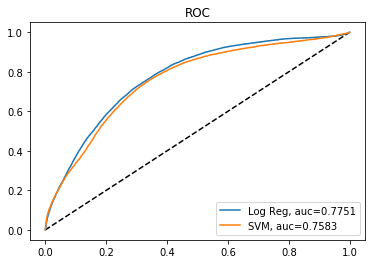

In [153]:
plt.subplot(111)
plt.plot([0, 1], [0, 1], 'k--')
ROC_curve_Plot(Y_test, logreg.predict_proba(X_test)[:,1],"Log Reg")
ROC_curve_Plot(Y_test, my_svm.predict_proba(X_test)[:,1],"SVM")
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.title('ROC')


In [154]:
def Threshold_Plot(y_test, y_pred, label):
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    plt.subplot(121)
    plt.xlim(0, 1)
    plt.plot(thresholds,fpr)
    plt.plot(thresholds,fpr,label=label)
    plt.legend(loc=3)
    plt.subplot(122)
    plt.plot(thresholds,tpr)
    plt.xlim(0, 1)
    plt.plot(thresholds,tpr,label=label)
    plt.legend(loc=3)

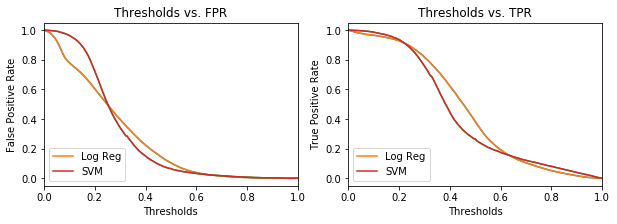

In [155]:
f = plt.figure(figsize=(10,3))

ax = f.add_subplot(121)
ax.set_xlabel('Thresholds')
ax.set_ylabel('False Positive Rate')
plt.title('Thresholds vs. FPR')

ax2 = f.add_subplot(122)
ax2.set_xlabel('Thresholds')
ax2.set_ylabel('True Positive Rate')
plt.title('Thresholds vs. TPR')

Threshold_Plot(Y_test, logreg.predict_proba(X_test)[:,1],"Log Reg")
Threshold_Plot(Y_test, my_svm.predict_proba(X_test)[:,1],"SVM")



### Model selection with Cross-Validation 

In [156]:
from sklearn.model_selection import KFold


def xValSVM(dataset, label_name, k, cs):
    cv = KFold(n_splits = k)
    aucs = {}

    for train_index, test_index in cv.split(dataset):
        cv_train = dataset.iloc[train_index]
        cv_validate = dataset.iloc[test_index]
    
        for c in cs:
            my_svm = svm.SVC(kernel = 'linear', C = c, probability = True)
            my_svm.fit(cv_train.drop([label_name, "EventId"], 1),cv_train[label_name])
            auc = roc_auc_score(cv_validate[label_name], my_svm.predict_proba(cv_validate.drop([label_name, "EventId"],1))[:,1])

            if c in aucs:
                aucs[c].append(auc)
            else:
                aucs[c] = [auc]
    

    return aucs

In [157]:
cs = [10**i for i in range(-8,2)]

In [158]:
aucs = xValSVM(data_train, 'Y', 10, cs)

In [159]:
aucs

{1e-08: [0.6780210867802108,
  0.695280329426671,
  0.6483226102941175,
  0.6466468590831919,
  0.7040601836486338,
  0.7044976881042454,
  0.6544731099987164,
  0.6795238095238095,
  0.7288566468253967,
  0.6937984496124031],
 1e-07: [0.6796431467964315,
  0.6953859148981101,
  0.6482077205882352,
  0.6465938030560271,
  0.7043920787697755,
  0.7065994115174443,
  0.6533179309459634,
  0.6792857142857143,
  0.7289186507936507,
  0.6935769656699889],
 1e-06: [0.6848569111342834,
  0.695280329426671,
  0.6557904411764706,
  0.652695246179966,
  0.7049452373050116,
  0.7171605716687683,
  0.6539596970863817,
  0.6792857142857144,
  0.7291666666666666,
  0.6935769656699889],
 1e-05: [0.7127795156992236,
  0.710062295428149,
  0.6778492647058822,
  0.6835738539898131,
  0.6946564885496184,
  0.7473728457335014,
  0.6801437556154537,
  0.6922619047619049,
  0.7302207341269842,
  0.7109634551495017],
 0.0001: [0.7154443285830148,
  0.715658325414423,
  0.6801470588235294,
  0.687924448217317

In [160]:
import numpy as np
import math

In [161]:
xval_dict = {'c':[], 'mu':[], 'sig':[]}
k = 10
for c in cs:
    xval_dict['c'].append(math.log10(c))
    xval_dict['mu'].append(np.array(aucs[c]).mean())
    xval_dict['sig'].append(np.sqrt(np.array(aucs[c]).var()/k))

In [162]:
xval_dict

{'c': [-8.0, -7.0, -6.0, -5.0, -4.0, -3.0, -2.0, -1.0, 0.0, 1.0],
 'mu': [0.6833480773297398,
  0.683592133732134,
  0.6866717780599922,
  0.7039884113760031,
  0.7069946524586339,
  0.7085723254883278,
  0.7320271260796557,
  0.7446433084790022,
  0.7478161018407218,
  0.7476716202907847],
 'sig': [0.008154412643071469,
  0.00826247910954524,
  0.008016907001282585,
  0.00680172273107183,
  0.006860486064358651,
  0.00680606245961955,
  0.007755540654085103,
  0.008463796394273077,
  0.008226895464901178,
  0.00824291322860035]}

In [163]:
max= 0
id = 0
i=0
while i < 10:
    val = xval_dict['mu'][i] - xval_dict['sig'][i]
    if val > max:
        max = val
        id = xval_dict['c'][i]
    i+=1
max_e_auc = [max,id]

In [164]:
max_e_auc

[0.7395892063758206, 0.0]

In [165]:
max = {'max_e_auc':[]}
for i in range(0,10):
    max['max_e_auc'].append(max_e_auc[0])
max = pd.DataFrame(max)

In [166]:
res = pd.DataFrame(xval_dict)
res['low'] = res['mu'] - 2*res['sig']
res['high'] = res['mu'] + 2*res['sig']

In [167]:
res = pd.concat([res,max],axis=1)
res

,c,mu,sig,low,high,max_e_auc
0,-8.0,0.683348,0.008154,0.667039,0.699657,0.739589
1,-7.0,0.683592,0.008262,0.667067,0.700117,0.739589
2,-6.0,0.686672,0.008017,0.670638,0.702706,0.739589
3,-5.0,0.703988,0.006802,0.690385,0.717592,0.739589
4,-4.0,0.706995,0.006860,0.693274,0.720716,0.739589
5,-3.0,0.708572,0.006806,0.694960,0.722184,0.739589
6,-2.0,0.732027,0.007756,0.716516,0.747538,0.739589
7,-1.0,0.744643,0.008464,0.727716,0.761571,0.739589
8,0.0,0.747816,0.008227,0.731362,0.764270,0.739589
9,1.0,0.747672,0.008243,0.731186,0.764157,0.739589


Text(0.5, 1.0, 'X-validated AUC by C')

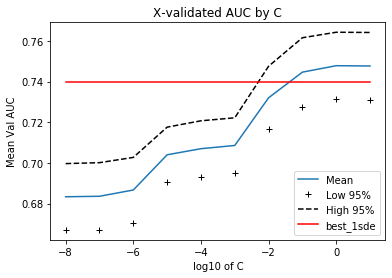

In [168]:
fig = plt.figure()
ax = fig.add_subplot(111)

plt.plot(res['c'], res['mu'], label = 'Mean')
plt.plot(res['c'], res['low'], 'k+', label = 'Low 95%')
plt.plot(res['c'], res['high'], 'k--', label = 'High 95%')
plt.plot(res['c'], res['max_e_auc'], 'r', label = 'best_1sde')

plt.legend(loc = 4)
ax.set_xlabel('log10 of C')
ax.set_ylabel('Mean Val AUC')
plt.title('X-validated AUC by C')


### Bootstrapping


In [169]:
import warnings
warnings.filterwarnings('ignore')

In [170]:
def modBootstrapper(train, test, nruns, sampsize, lr, c):
    
    auc_res = []
    for i in range(nruns):
        train_samp = train.loc[np.random.randint(0,len(train), size = sampsize)]
        if lr ==1: #log reg fit
            logreg = linear_model.LogisticRegression()
            logreg.fit(train_samp.drop(["EventId","Y"],1),train_samp["Y"])
            try:
                auc_res.append(roc_auc_score(test["Y"],logreg.predict_proba(test.drop(["EventId","Y"],1))[:,1]))
            except:
                oops = 1
        elif lr == 0: #svm fit
            my_svm = svm.SVC(C=10,kernel='linear',probability = True)
            my_svm = my_svm.fit(train_samp.drop(["EventId","Y"],1),train_samp["Y"])
            try:
                auc_res.append(roc_auc_score(test["Y"],my_svm.predict_proba(test.drop(["EventId","Y"],1))[:,1]))
            except:
                oops = 1
                
    return (np.mean(auc_res),np.sqrt(np.var(auc_res)))

In [174]:
samplesize = [50,100,200,500,1000,1500,2000]

In [175]:
#Bootstrapping for log reg
lr_means = []
lr_sigs = []
for i in samplesize:
    mean, sig = modBootstrapper(data_train,data_test,20,i,1,10)
    lr_means.append(mean)
    lr_sigs.append(sig)

In [176]:
#Bootstrapping for SVM
svm_means = []
svm_sigs = []
for i in samplesize:
    mean, sig = modBootstrapper(data_train,data_test,20,i,0,10)
    svm_means.append(mean)
    svm_sigs.append(sig)

In [177]:
log_reg = pd.DataFrame(list(zip(lr_means, lr_sigs)), columns =['mu', 'sig'], index = samplesize)

In [178]:
log_reg

,mu,sig
50,0.695948,0.052231
100,0.735327,0.021664
200,0.747492,0.020181
500,0.764999,0.008714
1000,0.770246,0.003955
1500,0.770782,0.002789
2000,0.772113,0.001846


In [179]:
svm = pd.DataFrame(list(zip(svm_means, svm_sigs)), columns =['mu', 'sig'], index = samplesize)

In [180]:
svm

,mu,sig
50,0.606860,0.146065
100,0.687611,0.092002
200,0.728978,0.015854
500,0.748668,0.010544
1000,0.747919,0.016815
1500,0.750174,0.010760
2000,0.753508,0.008061


In [181]:
log_reg['low'] = log_reg['mu'] - 2*log_reg['sig']
log_reg['high'] = log_reg['mu'] + 2*log_reg['sig']

In [182]:
svm['low'] = svm['mu'] - 2*svm['sig']
svm['high'] = svm['mu'] + 2*svm['sig']

Text(0, 0.5, 'Test Set AUC')

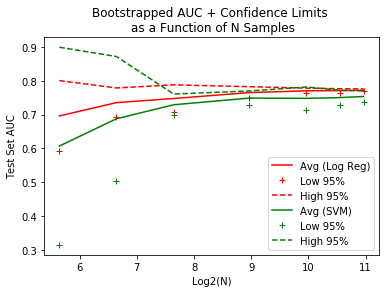

In [183]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.title('Bootstrapped AUC + Confidence Limits \n as a Function of N Samples')

#plotting log reg results
plt.plot(np.log2(samplesize), log_reg['mu'], 'r', label = "Avg (Log Reg)")
plt.plot(np.log2(samplesize), log_reg['low'], 'r+', label = 'Low 95%')
plt.plot(np.log2(samplesize), log_reg['high'], 'r--', label = 'High 95%')

#plotting svm results
plt.plot(np.log2(samplesize), svm['mu'], 'g', label = "Avg (SVM)")
plt.plot(np.log2(samplesize), svm['low'], 'g+', label = 'Low 95%')
plt.plot(np.log2(samplesize), svm['high'], 'g--', label = 'High 95%')

plt.legend(loc = 4)
ax.set_xlabel('Log2(N)')
ax.set_ylabel('Test Set AUC')